In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 4
import matplotlib.pyplot as plt

In [4]:
datasetVendas = pd.read_csv('Vendas_Diarias.csv', sep = ",")
datasetVendas

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
...,...,...
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244


In [5]:
# Converte a coluna Total_Vendas para numérico (se necessário)
datasetVendas['Total_Vendas'] = pd.to_numeric(datasetVendas['Total_Vendas'], errors='coerce')
# Converte a coluna Data para o formato datetime
datasetVendas['Data'] = pd.to_datetime(datasetVendas['Data'])
datasetVendas

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396
...,...,...
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244


# **Análise exploratória no formato mensal**

In [7]:
# Agrupa os valores por mês e soma
datasetVendasMensal = datasetVendas.groupby(datasetVendas['Data'].dt.to_period('M'))['Total_Vendas'].sum().reset_index()
# Converte o índice de volta para datetime para um melhor formato
datasetVendasMensal['Data'] = datasetVendasMensal['Data'].dt.to_timestamp()
# Exibe o resultado
print('Resultado dataset agrupado por mês: \n', (datasetVendasMensal))
mediaAnualTotalVendas = datasetVendasMensal['Total_Vendas'].mean() # Soma dos valores de cada mes divido por 
print('\nMédia Mensal: {:.2f}'.format(mediaAnualTotalVendas))

Resultado dataset agrupado por mês: 
          Data  Total_Vendas
0  2023-01-01   1560.587027
1  2023-02-01   1442.256437
2  2023-03-01   1661.761162
3  2023-04-01   1645.893941
4  2023-05-01   1768.165178
5  2023-06-01   1777.855749
6  2023-07-01   1869.042792
7  2023-08-01   1908.261083
8  2023-09-01   1855.021848
9  2023-10-01   2024.041978
10 2023-11-01   2012.635660
11 2023-12-01   2065.129330

Média Mensal: 1799.22


In [8]:
df = pd.DataFrame(datasetVendasMensal)
df['Data'] = pd.to_datetime(df['Data'])  # Convertendo a coluna Data para datetime
df['Mês'] = df['Data'].dt.strftime('%b')  # Extraindo o nome do mês
df

,Data,Total_Vendas,Mês
0,2023-01-01,1560.587027,Jan
1,2023-02-01,1442.256437,Feb
2,2023-03-01,1661.761162,Mar
3,2023-04-01,1645.893941,Apr
4,2023-05-01,1768.165178,May
5,2023-06-01,1777.855749,Jun
6,2023-07-01,1869.042792,Jul
7,2023-08-01,1908.261083,Aug
8,2023-09-01,1855.021848,Sep
9,2023-10-01,2024.041978,Oct


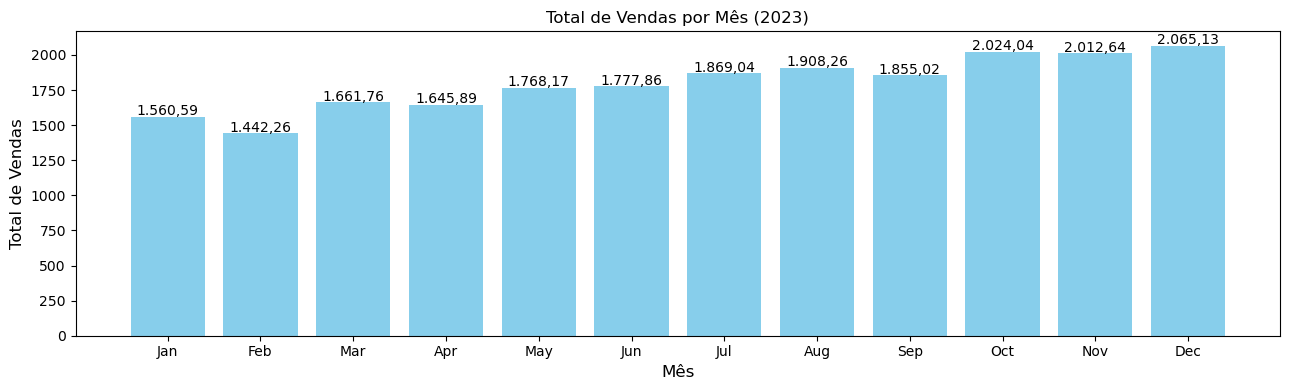

In [9]:
# Configurar o locale para formato brasileiro
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
# Plotando o gráfico de barras
plt.figure(figsize=(13, 4))
bars = plt.bar(df['Mês'], df['Total_Vendas'], color='skyblue')

# Adicionando os valores nas barras
for bar, valor in zip(bars, df['Total_Vendas']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posição no eixo X
        bar.get_height() - 10,             # Posição no eixo Y (um pouco acima da barra)
        locale.format_string('%.2f', valor, grouping=True),  # Formato brasileiro
        ha='center', va='bottom', fontsize=10  # Centralizado e com fonte ajustada
    )
# Configurações do gráfico
plt.title('Total de Vendas por Mês (2023)', fontsize=12)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.tight_layout()
# Mostrar o gráfico
plt.show()

In [10]:
#Inforando o número de linhas e colunas
datasetVendasMensal.shape

(12, 2)

In [11]:
#Informando os tipos de dados
datasetVendasMensal.dtypes

Data            datetime64[ns]
Total_Vendas           float64
dtype: object

## **Verificando os valores de outliers**

In [13]:
# Calculando Q1, Q3 e IQR
Q1 = datasetVendasMensal['Total_Vendas'].quantile(0.25)
Q3 = datasetVendasMensal['Total_Vendas'].quantile(0.75)
IQR = Q3 - Q1

In [14]:
# Definindos os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [15]:
# Identificando os outliers com a criação da coluna: Outlier
datasetVendasMensal_Ajuste = datasetVendasMensal.copy()  # Garante que você está trabalhando com uma cópia
datasetVendasMensal_Ajuste.loc[:, 'Outlier'] = (datasetVendasMensal['Total_Vendas'] < limite_inferior) | (datasetVendasMensal['Total_Vendas'] > limite_superior)
datasetVendasMensal_Ajuste

,Data,Total_Vendas,Outlier
0,2023-01-01,1560.587027,False
1,2023-02-01,1442.256437,False
2,2023-03-01,1661.761162,False
3,2023-04-01,1645.893941,False
4,2023-05-01,1768.165178,False
5,2023-06-01,1777.855749,False
6,2023-07-01,1869.042792,False
7,2023-08-01,1908.261083,False
8,2023-09-01,1855.021848,False
9,2023-10-01,2024.041978,False


In [16]:
# Verifica se há pelo menos um outlier
outlier_counts = datasetVendasMensal_Ajuste['Outlier'].value_counts()
# Verifica se há outliers 
if outlier_counts.get(True, 0) > 0:
    print("Quantidade de outliers: ", outlier_counts[True])
    print("Resultado: Possui outliers")
else:
    print("Quantidade de outliers: 0")
    print("Resultado: Não possui outliers")

Quantidade de outliers: 0
Resultado: Não possui outliers


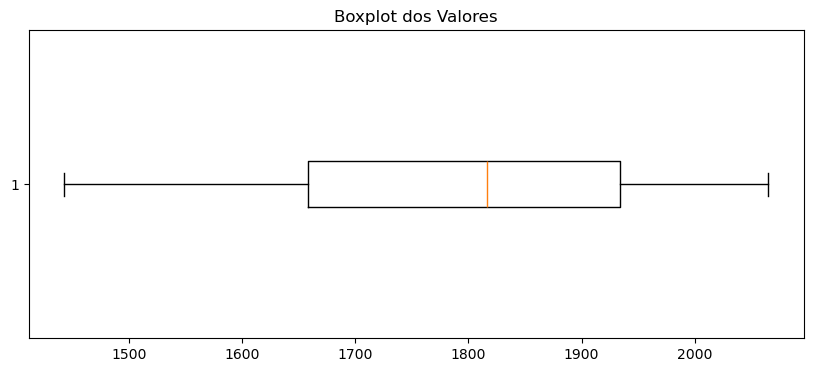

In [17]:
#Visualização de Gráficos com o BoxPlot para verificar a ausencia de outliers
plt.boxplot(datasetVendasMensal_Ajuste['Total_Vendas'], vert=False)
plt.title('Boxplot dos Valores')
plt.show()

In [18]:
# Excluindo a coluna Outlier 
datasetVendasMensal_Ajuste.drop(columns='Outlier')

,Data,Total_Vendas
0,2023-01-01,1560.587027
1,2023-02-01,1442.256437
2,2023-03-01,1661.761162
3,2023-04-01,1645.893941
4,2023-05-01,1768.165178
5,2023-06-01,1777.855749
6,2023-07-01,1869.042792
7,2023-08-01,1908.261083
8,2023-09-01,1855.021848
9,2023-10-01,2024.041978


In [19]:
type(datasetVendasMensal_Ajuste)

pandas.core.frame.DataFrame

In [20]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = datasetVendasMensal_Ajuste.set_index('Data')['Total_Vendas']
serie_temporal = serie_temporal.asfreq('MS')
type(serie_temporal)

pandas.core.series.Series

In [21]:
serie_temporal

Data
2023-01-01    1560.587027
2023-02-01    1442.256437
2023-03-01    1661.761162
2023-04-01    1645.893941
2023-05-01    1768.165178
2023-06-01    1777.855749
2023-07-01    1869.042792
2023-08-01    1908.261083
2023-09-01    1855.021848
2023-10-01    2024.041978
2023-11-01    2012.635660
2023-12-01    2065.129330
Freq: MS, Name: Total_Vendas, dtype: float64

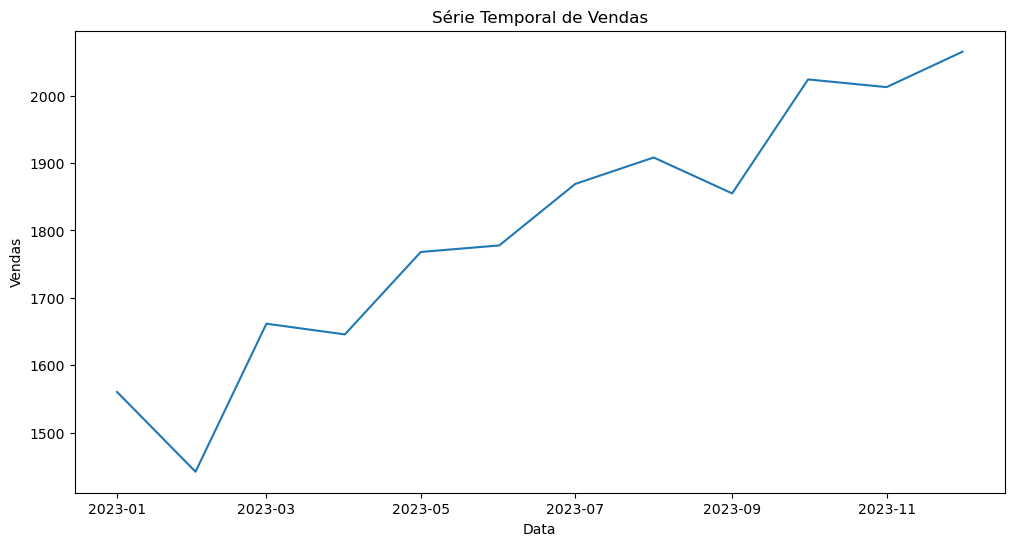

In [22]:
# Cria o gráfico da série temporal 
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.show()

In [23]:
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [24]:
# Cria o modelo Suavização Exponencial Simples.
modelo = SimpleExpSmoothing(serie_temporal)

In [25]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.3, optimized=False)

In [26]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

In [27]:
suavizacao_exponencial

Data
2023-01-01    1560.587027
2023-02-01    1560.587027
2023-03-01    1525.087850
2023-04-01    1566.089843
2023-05-01    1590.031073
2023-06-01    1643.471304
2023-07-01    1683.786638
2023-08-01    1739.363484
2023-09-01    1790.032764
2023-10-01    1809.529489
2023-11-01    1873.883236
2023-12-01    1915.508963
Freq: MS, dtype: float64

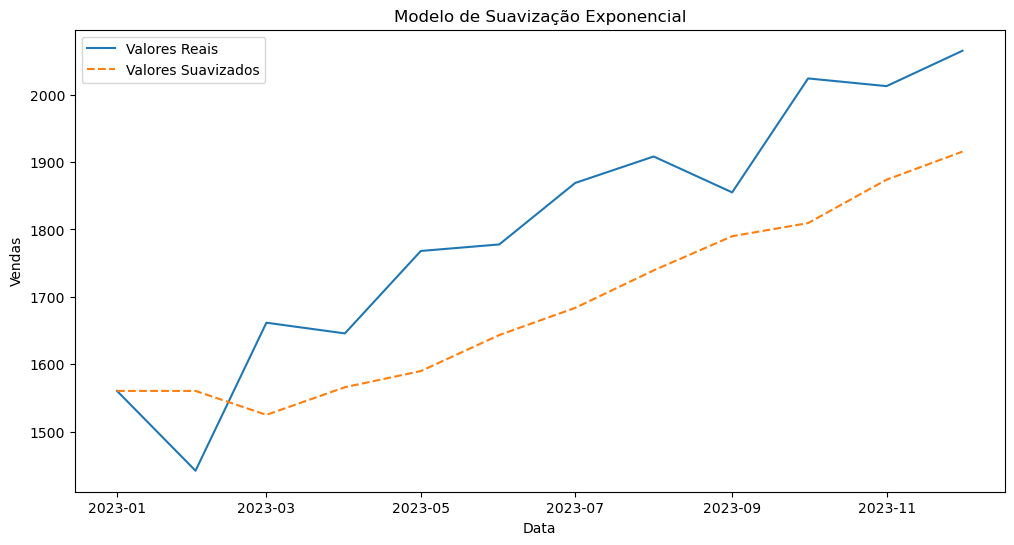

In [28]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Suavizados', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

## **Previsão com o Modelo Treinado Valores Mensais**

In [30]:
# Faz previsão somente para o mes de janeiro com valores acumulados 
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)
# Previsão para Janeiro/2024
previsao_janeiro_2024 = previsoes.iloc[0]
print('Previsão do Total de Vendas Para Janeiro/2024:', round(previsao_janeiro_2024, 2))

Previsão do Total de Vendas Para Janeiro/2024: 1960.4


# **AVALIANDO O DESEMPENHO**

In [32]:
print('Média anual em meses (Somatório acumulado): {:.2f}'.format(mediaAnualTotalVendas))

Média anual em meses (Somatório acumulado): 1799.22


In [33]:
#Acessando o primeiro valor do datasetVendasMensal 
primeiro_valor = datasetVendasMensal.iloc[0]['Total_Vendas']
print(primeiro_valor)  

1560.587026507696


In [34]:
# Lista com valor real de janeiro de 2023 (somatório do mês)
lista = [primeiro_valor]
valor_real = pd.DataFrame(lista, columns = ['valor real'])
print(valor_real)

    valor real
0  1560.587027


In [35]:
# Convertendo o valor da previsão em uma lista
lista = [previsao_janeiro_2024]
valor_previsto = pd.DataFrame(lista, columns=['valor previsto'])
print(valor_previsto)



   valor previsto
0     1960.395073


In [36]:
desempenho = pd.concat([valor_real, valor_previsto],axis=1)
desempenho

,valor real,valor previsto
0,1560.587027,1960.395073


# **ERRO MÉDIO ABSOLUTO (MAE)**

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
print('ERRO MÉDIO ABSOLUTO (MAE)') 
mae = mean_absolute_error(desempenho['valor real'], desempenho['valor previsto'])
#Suavização Exponencial Simples
print('SES: {:.2f}'.format(mae))

try:
    print('MÉDIA: {:.2f}'.format(mediaAnualTotalVendas))
except NameError:
    print('Erro: A variável "mediaAnualTotalVendas" não foi definida.')
    
resultado = (lambda mae, media: 'Modelo aprovado' if mae < media else 'Modelo não aprovado')(mae, mediaAnualTotalVendas)
print(resultado)

ERRO MÉDIO ABSOLUTO (MAE)
SES: 399.81
MÉDIA: 1799.22
Modelo aprovado


# **ERRO QUADRÁTICO MÉDIO (MSE)**

In [41]:
print('ERRO QUADRÁTICO MÉDIO (MSE)')
mse = mean_squared_error(desempenho['valor real'], desempenho['valor previsto'])
#Suavização Exponencial Simples
print('SES: {:.2f}'.format(mse))

def calcular_mediaAnualTotalVendas(mediaAnualTotalVendas):
    media_valor_venda_ao_quadrado = mediaAnualTotalVendas ** 2
    return media_valor_venda_ao_quadrado

try:
    media_ao_quadrado = calcular_mediaAnualTotalVendas(mediaAnualTotalVendas)
    print('MÉDIA: {:.2f}'.format(media_ao_quadrado))
    
    percentual_mse = (mse / media_ao_quadrado) * 100
    print('%: {:.2f}'.format(percentual_mse))

    if percentual_mse < 10:
        print('Modelo excelente')
    elif percentual_mse < 30:
        print('Modelo bom')
    elif percentual_mse < 50:
        print('Modelo razoável')
    else:
        print('Modelo rejeitado')

except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')


ERRO QUADRÁTICO MÉDIO (MSE)
SES: 159846.47
MÉDIA: 3237196.26
%: 4.94
Modelo excelente


# **RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

In [43]:
from sklearn.metrics import mean_squared_error
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)')
mse = mean_squared_error(desempenho['valor real'], desempenho['valor previsto'])
rmse = np.sqrt(mse)
print('SES: {:.2f}'.format(rmse))

try:
    print('MÉDIA: {:.2f}'.format(mediaAnualTotalVendas))
except NameError:
    print('Erro: A variável "media_valor_venda" não foi definida.')

resultado = (lambda rmse, media: 'Modelo aprovado' if rmse < media else 'Modelo não aprovado')(rmse, mediaAnualTotalVendas)
print(resultado)


RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
SES: 399.81
MÉDIA: 1799.22
Modelo aprovado


# **ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)**

In [45]:
print('ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)')
desempenho.loc[:, 'valor real'] = pd.to_numeric(desempenho['valor real'], errors='coerce')
desempenho.loc[:, 'valor previsto'] = pd.to_numeric(desempenho['valor previsto'], errors='coerce')
# Calculando o MAPE
mape = np.mean(np.abs((desempenho['valor real'] - desempenho['valor previsto']) / desempenho['valor real'])) * 100
# Suavização Exponencial Simples
print('SES: {:.2f}%'.format(mape))

try:
    print('MÉDIA: {:.2f}'.format(mediaAnualTotalVendas))
except NameError:
    print('Erro: A variável "mediaAnualTotalVendas" não foi definida.')

# Avaliando o desempenho do modelo
if mape < 10: 
    print('Modelo excelente')
elif mape < 20: 
    print('Modelo bom')
elif mape < 50:
    print('Modelo razoável') 
else: 
    print('Modelo ruim')

ERRO PERCENTUAL MÉDIA ABSOLUTO (MAPE)
SES: 25.62%
MÉDIA: 1799.22
Modelo razoável


1. Erro Médio Absoluto (MAE)
O Erro Médio Absoluto (Mean Absolute Error - MAE) é a média das diferenças absolutas entre os valores previstos e os valores reais. Em outras palavras, mede o quanto as previsões estão, em média, distantes dos valores reais.

2. Erro Quadrático Médio (MSE)
O Erro Quadrático Médio (Mean Squared Error - MSE) é a média dos quadrados das diferenças entre os valores previstos e os valores reais. Ele é útil porque penaliza erros maiores de forma mais intensa.

3. Raiz do Erro Quadrático Médio (RMSE)
A Raiz do Erro Quadrático Médio (Root Mean Squared Error - RMSE) é a raiz quadrada do MSE. Isso traz a métrica para a mesma unidade dos dados originais, facilitando a interpretação.

4. Erro Percentual Médio Absoluto (MAPE)
O Erro Percentual Médio Absoluto (Mean Absolute Percentage Error - MAPE) é a média das diferenças absolutas entre os valores previstos e os valores reais, expressa como uma porcentagem dos valores reais. É útil para entender a precisão relativa do modelo.